In [155]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from lab_utils_uni import plt_intuition, plt_stationary, plt_update_onclick, soup_bowl
plt.style.use('./deeplearning.mplstyle')
import math, copy
from lab_utils_uni import plt_house_x, plt_contour_wgrad, plt_divergence, plt_gradients

In [156]:
x_train=np.array([1.0,2.0])
y_train=np.array([300,500])
x_train[0]

np.float64(1.0)

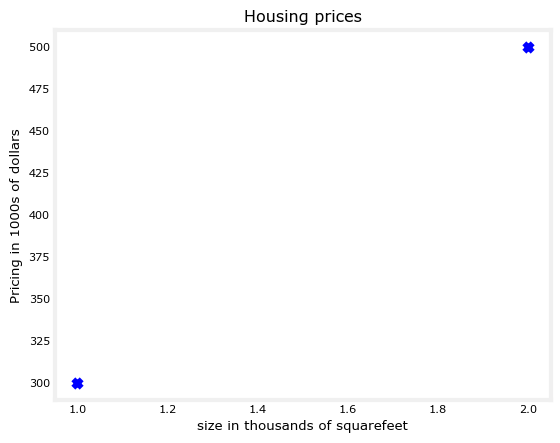

In [138]:
plt.scatter(x_train, y_train, marker='x', c='b')
plt.title('Housing prices')
plt.ylabel('Pricing in 1000s of dollars')
plt.xlabel("size in thousands of squarefeet")
plt.show()

In [163]:
w=150
b=100


In [157]:
def model(x,w,b):
    m=x.shape[0]
    f_wb=np.zeros(m)
    for i in range(m):
       f_wb[i]=w*x[i]+b
    return f_wb

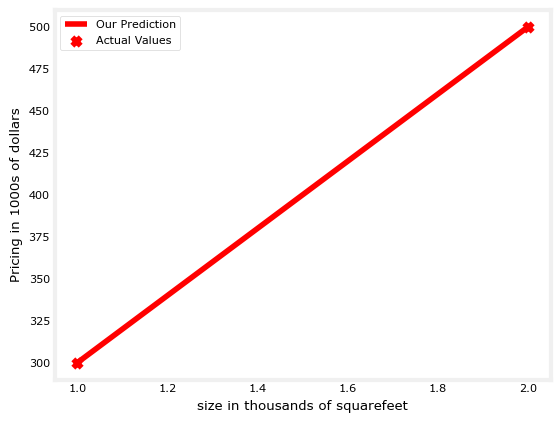

In [141]:
temp_f_wb= model(x_train,w,b)
plt.plot(x_train, temp_f_wb, c='r',label='Our Prediction')
plt.ylabel('Pricing in 1000s of dollars')
plt.xlabel("size in thousands of squarefeet")
plt.scatter(x_train, y_train, marker='x', c='r',label='Actual Values')

plt.legend()
plt.show()



In [142]:
def cost(x,y,w,b):
    m=x.shape[0]
    f_wb=np.zeros(m)
    cost_sum=0
    for i in range(m):
       f_wb[i]= w*x[i]+b
       cost=(f_wb-y[i])**2
       cost_sum= cost_sum + cost
    total_cost=(1/(2*m))*cost_sum
    return total_cost

[10000. 22500.]


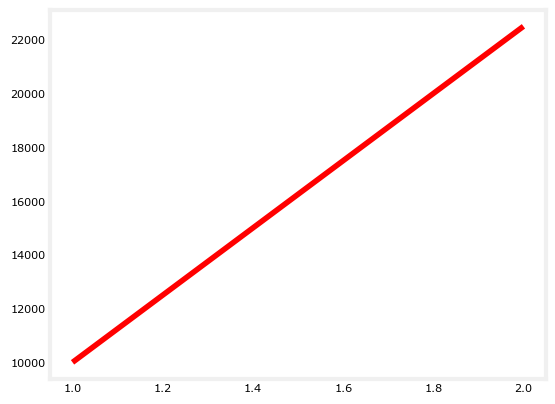

In [143]:
hi = cost(x_train,y_train,w,b)
print (hi)
plt.plot(x_train,hi, c='r',label='Our Prediction')


In [144]:
plt_intuition(x_train,y_train)

interactive(children=(IntSlider(value=150, description='w', max=400, step=10), Output()), _dom_classes=('widge…

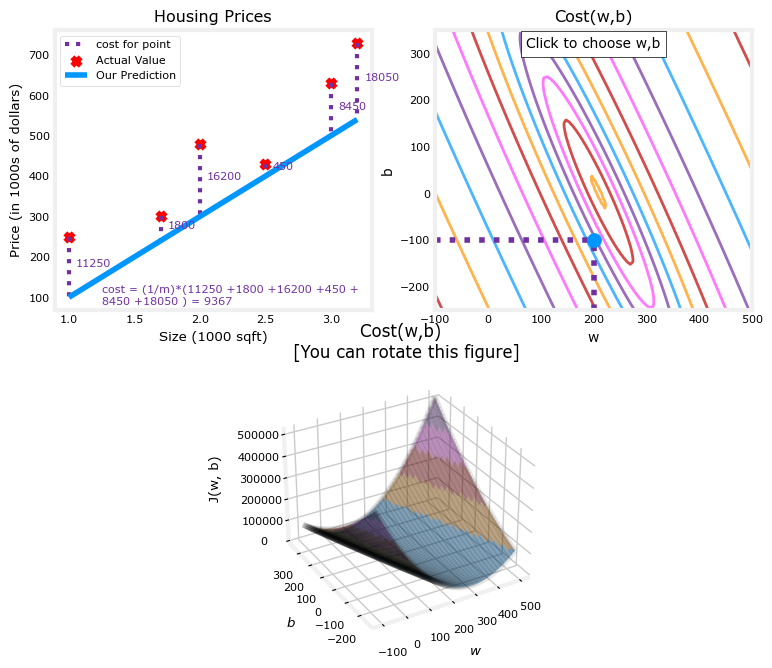

In [124]:
plt.close('all') 
fig, ax, dyn_items = plt_stationary(x_train, y_train)
updater = plt_update_onclick(fig, ax, x_train, y_train, dyn_items)

In [218]:
def compute_cost(x, y, w, b): 
    
    
    m = x.shape[0] 
    
    cost_sum = 0 
    for i in range(m): 
        f_wb = w * x[i] + b   
        cost = (f_wb - y[i]) ** 2  
        cost_sum = cost_sum + cost  
    total_cost = (1 / (2 * m)) * cost_sum  

    return total_cost

In [150]:
cd = compute_cost(x_train,y_train,201,100)
print(cd)


1.25


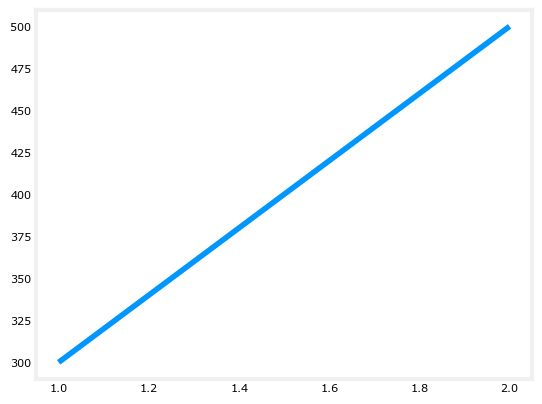

In [152]:
plt.plot(x_train,y_train)

In [228]:
def gradient_function(x,y,w,b):
    m=x.shape[0]
    pd_b_sum =0
    pd_w_sum =0
    for i in range(m):
       f_wb=w*x[i]+b
       pd_w=(f_wb-y[i])*x[i]
       pd_b=(f_wb-y[i])
       pd_b_sum += pd_b
       pd_w_sum += pd_w
       pd_b_sum= pd_b_sum/m
       pd_w_sum=pd_w_sum/m
    return pd_w_sum,pd_b_sum
    

In [168]:
gd= gradient_function(x_train,y_train,w,b)
print(gd)

(np.float64(-150.0), np.float64(-250.0))


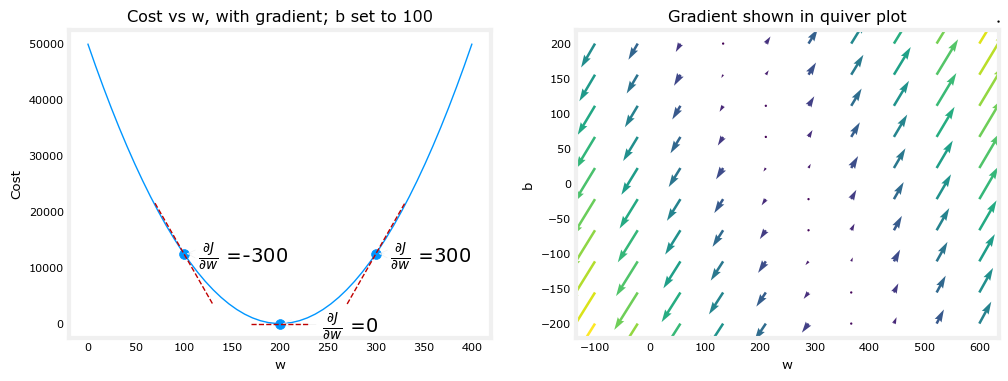

In [169]:
plt_gradients(x_train,y_train, compute_cost, gradient_function)
plt.show()

In [330]:
def gradient_descent(x,y,w_in,b_in,alpha,cost_function,gradient_function):
    m=1000
    w=w_in
    b=b_in
    for i in range (m):
     de_dw,de_db= gradient_function(x,y,w,b)
     w= w-(alpha*de_dw)
     b= b-(alpha*de_db)
    return w,b

In [320]:
w_in=0
b_in=0
alpha=0.02
w_final,b_final= gradient_descent(x_train,y_train,w_in,b_in,alpha,compute_cost,gradient_function)
print(w_final,b_final)

199.99999999999227 100.00000000001336


In [321]:
print(w_final*1+b_final)

300.0000000000056


In [301]:
x_new=np.array([21, 16, 24, 14, 30, 19, 15, 14, 13, 14, 19, 20, 18, 44, 12, 23, 13, 12, 26, 30, 17, 18, 16, 19, 38,
11,
14,
25,
22,
26,
18,
10,
20,
31,
18,
14,
12,
21,
42,
21,
16,
22,
25,
12,
18,
18,
12
])

In [304]:
x_new

array([21, 16, 24, 14, 30, 19, 15, 14, 13, 14, 19, 20, 18, 44, 12, 23, 13,
       12, 26, 30, 17, 18, 16, 19, 38, 11, 14, 25, 22, 26, 18, 10, 20, 31,
       18, 14, 12, 21, 42, 21, 16, 22, 25, 12, 18, 18, 12])

In [299]:
y_new=np.array([399, 329, 369, 232, 539, 299, 314, 198, 212, 242, 239, 347, 329, 699, 259, 449, 299, 199, 499, 599, 252, 255, 242, 259, 573, 249, 464, 469, 475, 299, 349, 169, 314, 579, 285, 249, 229, 345, 549, 287, 368, 329, 314, 299, 179, 299, 239
])

In [305]:
y_new

array([399, 329, 369, 232, 539, 299, 314, 198, 212, 242, 239, 347, 329,
       699, 259, 449, 299, 199, 499, 599, 252, 255, 242, 259, 573, 249,
       464, 469, 475, 299, 349, 169, 314, 579, 285, 249, 229, 345, 549,
       287, 368, 329, 314, 299, 179, 299, 239])

In [331]:
w_in=0
b_in=0
alpha=0.02
w_final,b_final= gradient_descent(x_new,y_new,w_in,b_in,alpha,compute_cost,gradient_function)
print(w_final,b_final)

19.602455463843977 1.8776696352360303


In [332]:
print(w_final*21+b_final)

413.52923437595956
